In [21]:
import pandas as pd
import numpy as np

In [86]:
import nltk

In [22]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [23]:
train_df1 = pd.read_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/train.csv')

In [24]:
test_df1 = pd.read_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/test.csv')

In [114]:
sample_sub1 = pd.read_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/sample_submission.csv')

In [27]:
train_df1.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [44]:
train_df1[~(train_df1.keyword.isna())].head(20)

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0


In [47]:
train_df1[train_df1.target == 1].location.value_counts().head(10)

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
London            16
UK                16
New York          16
Washington, DC    15
Canada            13
Name: location, dtype: int64

In [48]:
train_df1[train_df1.target == 0].location.value_counts().head(10)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
Name: location, dtype: int64

In [29]:
train_df1.target.value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [32]:
train_df1[train_df1.target == 1].text[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [34]:
train_df1[train_df1.target == 1].keyword.value_counts().head(20)

derailment               39
outbreak                 39
wreckage                 39
oil%20spill              37
debris                   37
typhoon                  37
suicide%20bombing        32
suicide%20bomb           32
evacuated                32
rescuers                 32
razed                    31
nuclear%20disaster       31
suicide%20bomber         30
earthquake               30
airplane%20accident      30
wildfire                 29
bridge%20collapse        29
collision                29
casualties               28
buildings%20on%20fire    28
Name: keyword, dtype: int64

In [36]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [38]:
train_df1["text"][0:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [73]:
text_df1 = count_vectorizer.fit(train_df1.text)

In [74]:
text_fnl = text_df1.transform(train_df1.text)

In [113]:
test_text_fnl = text_df1.transform(test_df1.text)

In [76]:
text_fnl.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [77]:
text_fnl.shape

(7613, 21637)

In [82]:
pd.DataFrame([text_df1.vocabulary_]).T.to_clipboard()

In [64]:
train_df1['text2'] = train_df1.text.str.lower()

In [66]:
word_count1 = train_df1.text.apply(lambda x: pd.value_counts(x.split(' ')))

In [85]:
pd.DataFrame(word_count1.columns).to_clipboard()

# logistic reg

In [121]:

kf = KFold(n_splits = 7)
output1 = []

for train_index, test_index in kf.split(train_df1):
    X_train, X_test = text_fnl[train_index], text_fnl[test_index]
    y_train, y_test = train_df1.target[train_index], train_df1.target[test_index]
    
    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train,y_train)
    
    pred1 = model.predict(X_test)
    
    output1.append(f1_score(y_test,pred1))
    
print(np.mean(output1))
    


0.6796105719537532


In [127]:
mod_train,mod_test = train_test_split(train_df1,test_size = 0.2)

In [130]:
x_train_1 = text_df1.transform(mod_train.text)
y_train_1 = mod_train.target

x_test_1 = text_df1.transform(mod_test.text)
y_test_1 = mod_test.target

In [140]:
model.fit(x_train_1,y_train_1)
lr_probs = model.predict_proba(x_test_1)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test_1, lr_probs)

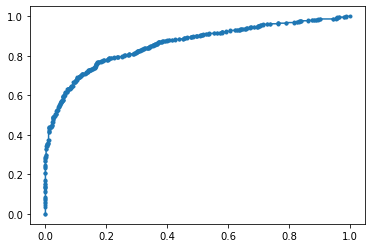

In [143]:
lr_fpr, lr_tpr, _ = roc_curve(y_test_1, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.show()

In [122]:
model.fit(text_fnl,train_df1.target)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
lr_prob = 

In [115]:
model.fit(text_fnl,train_df1.target)
sample_sub1.target = model.predict(test_text_fnl)
sample_sub1.to_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/output1_logistic_reg.csv')

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [119]:

kf = KFold(n_splits = 7)
output1 = []

for train_index, test_index in kf.split(train_df1):
    X_train, X_test = text_fnl[train_index], text_fnl[test_index]
    y_train, y_test = train_df1.target[train_index], train_df1.target[test_index]
    
    model = DecisionTreeClassifier(criterion='gini')
    model.fit(X_train,y_train)
    
    pred1 = model.predict(X_test)
    
    output1.append(f1_score(y_test,pred1))
    
print(np.mean(output1))
    


0.5902748306770744


In [115]:
model.fit(text_fnl,train_df1.target)
sample_sub1.target = model.predict(test_text_fnl)
sample_sub1.to_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/output1_logistic_reg.csv')

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
mod_train,mod_test = train_test_split(train_df1,test_size = 0.3,random_state=7)
x_train_1 = text_df1.transform(mod_train.text)
y_train_1 = mod_train.target

x_test_1 = text_df1.transform(mod_test.text)
y_test_1 = mod_test.target

In [161]:
kf = KFold(n_splits = 5)
#output1 = []
par = [10,20,50,60,70,100,120,150,170,190,200]

for i in par:
    #output1 = []
    #for train_index, test_index in kf.split(train_df1):
    #X_train, X_test = text_fnl[train_index], text_fnl[test_index]
    #y_train, y_test = train_df1.target[train_index], train_df1.target[test_index]

    model = RandomForestClassifier(max_depth=120,
                                   min_samples_split = 100)
    model.fit(x_train_1,y_train_1)

    pred1 = model.predict(x_test_1)

    #output1.append(f1_score(y_test,pred1))

    print('par : {} and f1 scor : {}'.format(i,f1_score(y_test_1,pred1)))

par : 10 and f1 scor : 0.7101891397193411
par : 20 and f1 scor : 0.7044632086851629


KeyboardInterrupt: 

In [163]:
model = RandomForestClassifier(max_depth=120,
                               min_samples_split = 100)
model.fit(text_fnl,train_df1.target)
sample_sub1.target = model.predict(test_text_fnl)
sample_sub1.to_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/output1_logistic_reg.csv',index=False)